In [46]:
!pip install glob
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import cv2 as cv
import glob
import os
import numpy as np
import matplotlib.pyplot as plt


In [48]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

def count_folders(directory):
    # Initialize a counter for folders
    folder_count = 0
    
    # Iterate over items in the directory
    for item in os.listdir(directory):
        # Check if the item is a directory
        if os.path.isdir(os.path.join(directory, item)):
            folder_count += 1
    
    return folder_count

def show(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    return img

In [49]:
folders = count_folders("organizedData")

In [50]:
data = []

for i in range(folders):
    imgs = load_images_from_folder(f'organizedData/{i}/')
    data.append(imgs)
print(len(data))

62


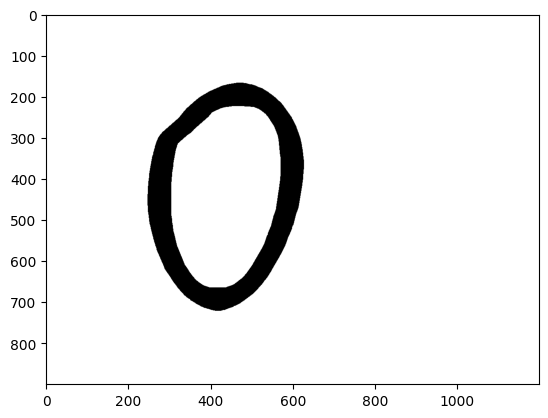

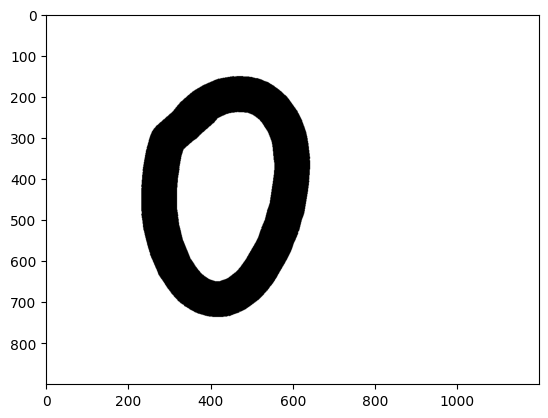

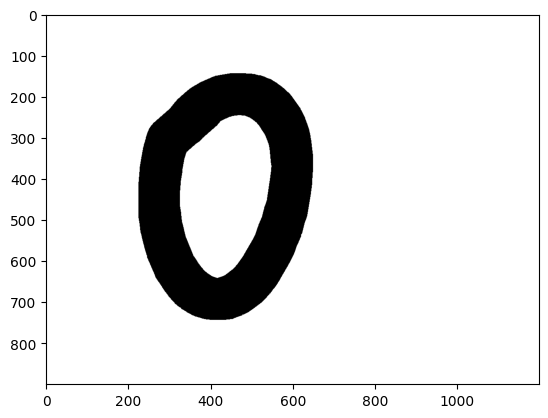

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [51]:
dilated_images = []
eroted_images = []


for i in range(folders):
    dil = []
    ero = []
    for img in data[i]:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        img1 = cv.dilate(img, np.ones((30, 30)))
        img2 = cv.erode(img, np.ones((15, 15)))

        dil.append(img1)
        ero.append(img2)

    dilated_images.append(dil)
    eroted_images.append(ero)

show(dilated_images[0][0])
show(data[0][0])
show(eroted_images[0][0])



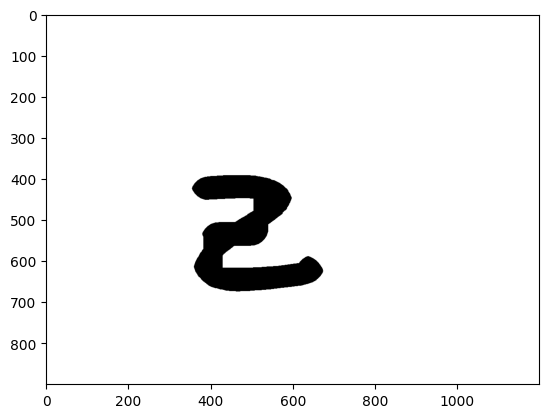

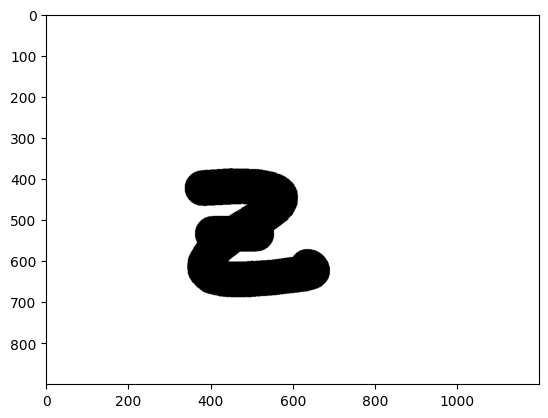

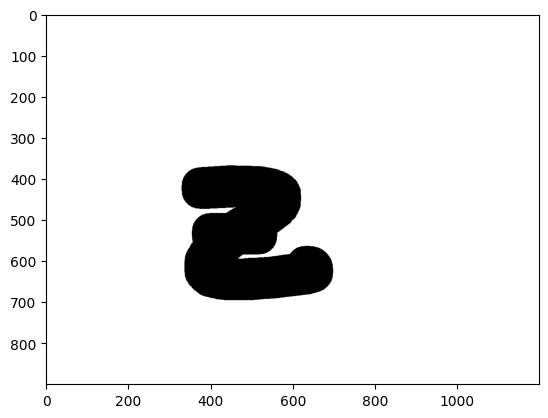

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [52]:
classe = 61

show(dilated_images[classe][0])
show(data[classe][0])
show(eroted_images[classe][0])

In [53]:
for i in range(folders):
    # Create a folder for the current index if it doesn't exist
    folder_path = f"organizedData/{i}"
    os.makedirs(folder_path, exist_ok=True)

    # Loop through each binary image in limiarized[i]
    for img_index, (img1, img2) in enumerate(zip(dilated_images[i], eroted_images[i])):
        # Get the original image name
        img_name = f"{img_index}"  # Update this according to your file naming convention

        # Save the binary image with the original name in the corresponding folder
        save_path_1 = os.path.join(folder_path, f"{img_name}_1.png")
        save_path_2 = os.path.join(folder_path, f"{img_name}_2.png")
        cv.imwrite(save_path_1, img1)
        cv.imwrite(save_path_2, img2)